In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


In [2]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [3]:
# Define the directory path where the files are located
directory_path=[]

directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_011_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_095_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_085_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_064_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_050_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')


# HEre I plot the difference in HR diagram 

1.1
0.95
0.85
0.64
0.5


Text(0.5, 0, '$m [M_\\odot]$')

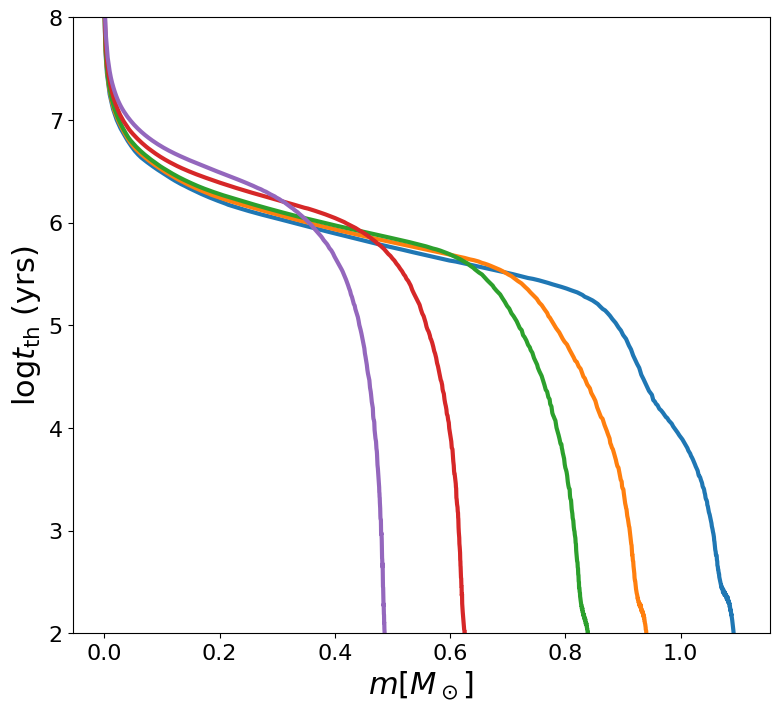

In [4]:
plt.style.use('default')

plt.rcParams["lines.linewidth"]=3
plt.rc('axes',labelsize=22)
plt.rc('legend',fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
i=0
fig,ax=plt.subplots(figsize=(9,8))


sigma=5.670e-5
for directory in directory_path:
    if i==0:
        h = MesaData(os.path.join(directory, 'profile4.data'))
    else:
        h = MesaData(os.path.join(directory, 'profile3.data'))
    print(h.star_mass)
    heightsquare=np.square(h.pressure_scale_height*6.96e10)
    diffusion=16*sigma*np.power(h.temperature,3)/(3*h.opacity*np.square(h.rho)*h.cp)
    plt.plot(h.q*h.star_mass,np.log10(heightsquare*3.17e-8/diffusion))
    i=i+1
    


plt.ylabel(r'$\mathrm{log}t_{\mathrm{th}}$ (yrs)')
#plt.axvline(x=0.623,color='black',linestyle='--')
#plt.xlim(0.0,0.64)

plt.ylim(2,8)
plt.xlabel(r"$m [M_\odot]$")
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.png")

In [5]:
from scipy.interpolate import interp1d

def create_interpolation_function(original_m, original_quantity):
    interpolation_function = interp1d(original_m, original_quantity, kind='linear', fill_value="extrapolate")
    return interpolation_function


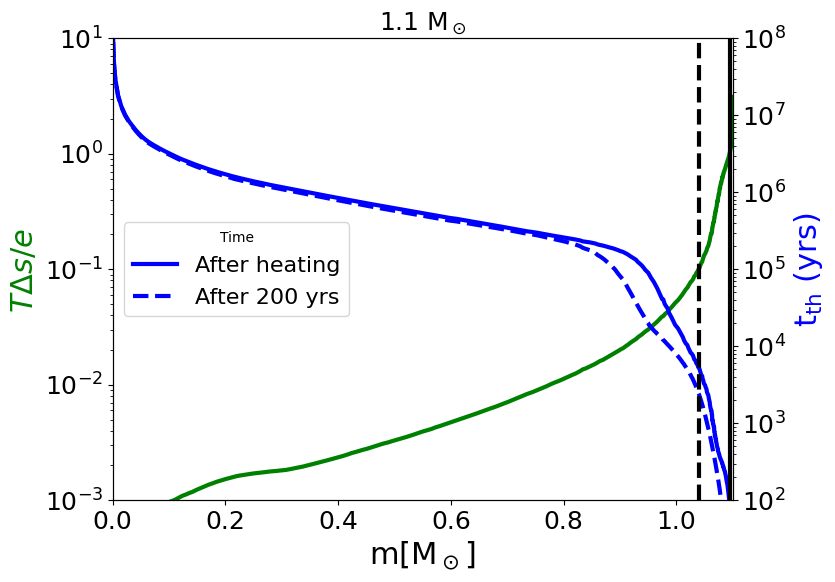

In [8]:

plt.rcParams["lines.linewidth"]=3
plt.rc('axes',labelsize=22)
plt.rc('legend',fontsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
i=0
fig,ax=plt.subplots(figsize=(8,6))

heightsquare=[]
diffusion=[]
h=[]
label=[]
sigma=5.670e-5
for directory in directory_path:
    if i==0:
        h1 = MesaData(os.path.join(directory, 'profile3.data'))
        h2 = MesaData(os.path.join(directory, '../LOGS_final_011_approx21_tail_2.0timesni56_0,01s_withoutmassloss_initial/profile1.data'))
        h3 = MesaData(os.path.join(directory, 'profile9.data'))
        #h4 = MesaData(os.path.join(directory, 'profile9.data'))
        #h5 = MesaData(os.path.join(directory, 'profile9.data'))
        h.extend([h2,h1,h3])
        #print(h3.star_age,h4.star_age,h5.star_age)
        new_m = np.linspace(0., 1.1, 3000)  #New mass coordinate range
        temp_wd_inital_func=create_interpolation_function(h2.q*1.1,np.power(10,h2.logT))
        entropy_initial=create_interpolation_function(h2.q*1.1,np.power(10,h2.logS))
        entropy_final=create_interpolation_function(h1.q*1.1,np.power(10,h1.logS))
        energy_initial=create_interpolation_function(h2.q*1.1,h2.energy)
    
        plt.plot()
        ax2=ax.twinx()

        linestyles=['solid','--','dotted','dashdot']
        for j in range(1,3):
            heightsquare.append(np.square(h[j].pressure_scale_height*6.96e10))
            diffusion=16*sigma*np.power(h[j].temperature,3)/(3*h[j].opacity*np.square(h[j].rho)*h[j].cp)
            ax2.plot(h[j].q*h[j].star_mass,heightsquare[j-1]*3.17e-8/diffusion,color='b',linestyle=linestyles[j-1])
            label.append("{:.2f}".format(np.log10(h[j].star_age)))
        ax2.legend(["After heating","After 200 yrs"],title="Time",loc="center left",fontsize=16)
        
        
        ax.plot(new_m,((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m)),color='g',linestyle='solid')
        m=new_m[np.where(((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m))>=1)]
        m2=new_m[np.where(((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m))>=0.1)]


    #else:
    #    h = MesaData(os.path.join(directory, 'profile3.data'))
    #print(h.star_age)

    i=i+1
    


ax.set_ylabel(r'$T\Delta s/e$ ',color='g')
ax2.set_ylabel(r'$\mathrm{t}_{\mathrm{th}}$ (yrs)',color='b')
ax2.set_ylim(1e2,1e8)
ax.set_ylim(1e-3,10)
ax.set_yscale("log")
ax2.set_yscale("log")
plt.xlim(0.0,1.1)
plt.axvline(x=m[0],color='k',linewidth=3)
plt.axvline(x=m2[0],color='k',linewidth=3,linestyle="--")
ax.set_xlabel(r"$\mathrm{m} [\mathrm{M}_\odot]$")
plt.title("1.1 M$_\odot$",fontsize=18)
plt.savefig("../../../D6_MESA/Plots/plots_paper/1,1Tdse.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/1,1Tdse.png",bbox_inches='tight')

['-9.80']
['-9.80', '3.81']


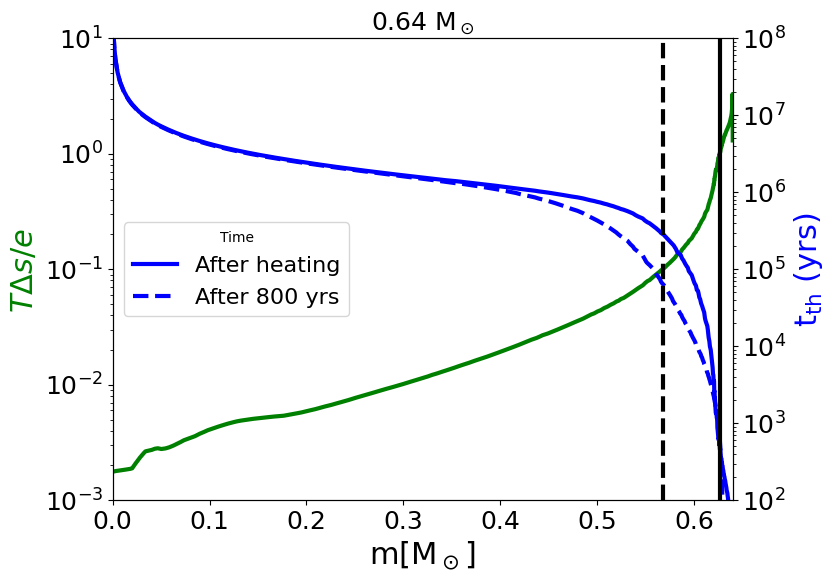

In [9]:

plt.rcParams["lines.linewidth"]=3
plt.rc('axes',labelsize=22)
plt.rc('legend',fontsize=22)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
i=0
fig,ax=plt.subplots(figsize=(8,6))

heightsquare=[]
diffusion=[]
h=[]
label=[]
sigma=5.670e-5
for directory in directory_path:
    if i==3:
        h1 = MesaData(os.path.join(directory, 'profile2.data'))
        h2 = MesaData(os.path.join(directory, '../LOGS_final_064_approx21_tail_2.0timesni56_0,01s_withoutmassloss/profile1.data'))
        #h3 = MesaData(os.path.join(directory, 'profile14.data'))
        h4 = MesaData(os.path.join(directory, 'profile19.data'))
        #h5 = MesaData(os.path.join(directory, 'profile20.data'))
        h.extend([h2,h1,h4])
        #print(h3.star_age,h4.star_age,h5.star_age)
        new_m = np.linspace(0., 0.64, 3000)  #New mass coordinate range
        temp_wd_inital_func=create_interpolation_function(h2.q*0.64,np.power(10,h2.logT))
        entropy_initial=create_interpolation_function(h2.q*0.64,np.power(10,h2.logS))
        entropy_final=create_interpolation_function(h1.q*0.64,np.power(10,h1.logS))
        energy_initial=create_interpolation_function(h2.q*0.64,h2.energy)
    
        plt.plot()
        ax2=ax.twinx()

        linestyles=['solid','--','dotted','dashdot']
        for j in range(1,3):
            heightsquare=np.square(h[j].pressure_scale_height*6.96e10)
            diffusion=16*sigma*np.power(h[j].temperature,3)/(3*h[j].opacity*np.square(h[j].rho)*h[j].cp)
            ax2.plot(h[j].q*h[j].star_mass,heightsquare*3.17e-8/diffusion,color='b',linestyle=linestyles[j-1])
            label.append("{:.2f}".format(np.log10(h[j].star_age)))
            print(label)
        ax2.legend(["After heating","After 800 yrs"],title="Time",loc="center left",fontsize=16)
        
        
        ax.plot(new_m,((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m)),color='g')
        m=new_m[np.where(((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m))>=1)]
        m2=new_m[np.where(((temp_wd_inital_func(new_m)*(entropy_final(new_m)-entropy_initial(new_m)))/energy_initial(new_m))>=0.1)]


    #else:
    #    h = MesaData(os.path.join(directory, 'profile3.data'))
    #print(h.star_age)

    i=i+1
    


ax.set_ylabel(r'$T\Delta s/e$ ',color='g')
ax2.set_ylabel(r'$\mathrm{t}_{\mathrm{th}}$ (yrs)',color='b')
ax2.set_ylim(1e2,1e8)
ax.set_ylim(1e-3,10)
ax.set_yscale("log")
ax2.set_yscale("log")
plt.xlim(0.0,0.64)
plt.axvline(x=m[0],color='k',linewidth=3)
plt.axvline(x=m2[0],color='k',linewidth=3,linestyle="--")
ax.set_xlabel(r"$\mathrm{m} [\mathrm{M}_\odot]$")
plt.title("0.64 M$_\odot$",fontsize=18)

plt.savefig("../../../D6_MESA/Plots/plots_paper/0,64Tdse.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/0,64Tdse.png",bbox_inches='tight')